# 

# Zeros of functions

Read about this topic here: [Solving for zeros with
julia](http://mth229.github.io/zeros.html).

This project is about finding the real zeros of a real-valued function
$f$. That is, those values of $x$ with $f(x)=0$.

Finding zeros of a polynomial (called “roots” when the function is a
polynomial) is a familiar task that can be aided by a few key equations,
such as the quadratic equation. However, in general, finding a zero of a
function will require a numeric approach. The `Roots` package of `Julia`
will provide some features. This is loaded when `MTH229` is:

In [1]:
using MTH229
using Plots
plotly()

Graphically, a zero of a continuous function $f(x)$ occurs where the
graph crosses or touches the $x$-axis. Without much work, a zero can be
*estimated* to one or two decimal points from a graph. For example, we
can zoom in on the zero of $f(x) = x^5 + x - 1$ by graphing over
$[0,1]$:


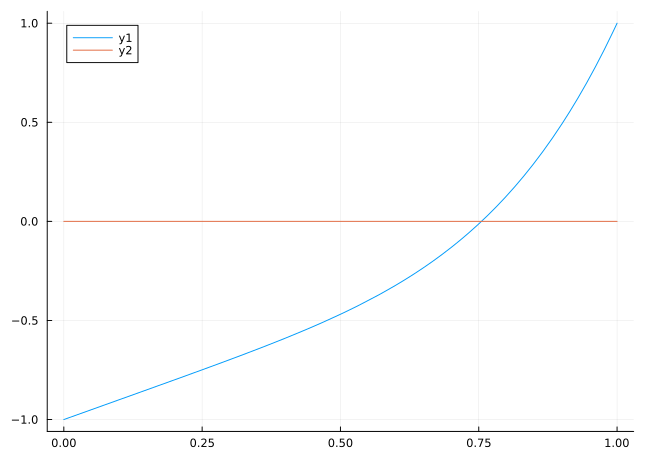

In [3]:
f(x) = x^5 + x - 1
plot(f, 0, 1)
plot!(zero)

We can see that the zero is near $0.75$, but be careful reading too much
into a graph. Since there are only so many pixels in a graph, and
typically even fewer points chosen, what looks like a curve is really
just a stick figure if you zoom in far enough. Replotting over a smaller
domain can give more accuracy, but it is better to use a graph to get a
sense of what the desired answer is *near* or *between* and then use a
*numeric* method to “zoom” in on the answer.

In this project we discuss one such method for “zooming in” – the
*bisection method* - when the zero is between two values, such as in
this plot where the zero is clearly **between**, say, $0$ and $1$.

#### The bisection method

The bisection method is a consequence on the *intermediate value
theorem*:

> The [intermediate value
> theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem)
> states that if a continuous function, $f$, over an interval, $[a, b]$,
> takes values $f(a)$ and $f(b)$ at each end of the interval, then it
> also takes any value between $f(a)$ and $f(b)$ at some point within
> the interval.

For our purposes, this is specialized to “Bolzano’s theorem:”

> If a continuous function has values of opposite sign inside a closed
> interval, then it has a zero in that interval

In particular, if $f(x)$ is *continuous* on $[a,b]$ **and** $f(a)$ and
$f(b)$ have different signs, then there **must** be a value $c$ with
$a < c < b$ where $f(c) = 0$.

There may be more than one zero, but there is a guarantee of at least
one.

## The bisection algorithm

Not all functions can have their real zeros solved algebraically, and
not all applications can be answered by the accuracy provided by a
graph. In such situations, numeric methods may be of interest.

To illustrate the bisection method, we discuss one step. This step is
then repeated until termination.

Consider $f(x) = \sin(x)$. A graph shows plainly that there is a zero
**between** $3$ and $4$. Formally, as $\sin(3) > 0$ and $\sin(4) < 0$
and the $\sin(x)$ function is continuous, this zero is guaranteed by
Bolzano. The algorithm works by taking this observation of a bracketing
interval ($[3,4]$) and reducing it in size by half at each step.

Let $[a,b] = [3,4]$ and $c = (a+b)/2 = 3.5$ be the mid-point. The value
of $f(c)$ must either be negative, positive, or zero. If $f(c)$ is zero,
we are done – a zero to $f$ between $[a,b]$ was identified. Otherwise,
either $f(a)$ and $f(c)$ or $f(c)$ and $f(b)$ have different signs. Form
a new interval $[a,c]$ in the first case and $[c,b]$ in the second. This
interval is half the size and has the same property of bracketing the
guaranteed zero. The algorithm iterates this step until termination.

The `MTH229` package defines a `bisection` method implementing the
bisection method, it assumes it has been passed values $a < b$ with
$f(a)$ and $f(b)$ having different signs. In short, `[a,b]` is a
bracketing interval for $f$.

Running this demo illustrates the division:

In [4]:
bisection(sin,  3, 4)

The first line shows `[3,4]`, the second the resulting interval
`[3, 3.5]`, the third the resulting interval `[3, 3.25]`, the fourth the
resulting interval `[3.125, 3.25]`, etc.

In the demo, after $8$ iterations, there isn’t enough resolution to show
more subdivisions, but mathematically, unless the algorithm finds an
exact zero, this process would continue infinitely, with the bracketing
interval getting infinitely small. In the process this traps the zero.

On the computer, the process basically stops when the size of the
bracketing interval gets too small to subdivide using floating point
numbers, unless instructed otherwise.

## The fzero function

In the `Roots` package is the `fzero` method that implements the
bisection method, only a bit more carefully. The `MTH229` package loads
this for you.

For a bracketing interval, it is guaranteed to find a `c` such that the
function changes sign between adjacent floating point values around `c`,
or `c` is an exact zero. It is used as: `fzero(f, a, b)`:

In [5]:
f(x) = x^2 - 2
fzero(f, 1, 2)          # finds sqrt(2)

1.4142135623730951

### Solving $f(x) = c$

Suppose the job is to identify when the function
$f(x) = e^x / (1 + e^x)$ is equal to $3/4$. That is solving
$f(x) = 3/4$. Our tool solves $f(x) = 0$. To use it, we define
$eqn(x) = f(x) - 3/4$. Then $eqn(x)$ is zero when $f(x)$ is $3/4$.

The function $f(x)$ is *increasing* so we can be very lazy with finding
a bracketing interval, as $eqn(0)$ will be negative and $eqn(100)$ very
close to $1$ and by monotonicity there can only be one zero, we have:

In [6]:
f(x) = exp(x) / (1 + exp(x))
eqn(x) = f(x) - 3/4
fzero(eqn, 0, 100)

1.0986122886681096

### Solving for $f(x) = g(x)$.

Many problems are more naturally expressed by solving $f(x) = g(x)$, and
not $f(x) = 0$, as expected by `fzero`. This is no issue, as it only
requires the extra step of defining a function of the differences
$eqn(x) = f(x) - g(x)$, as $eqn(x) = 0$ implies $f(x) = g(x)$.

For example, find the intersection point of $4 - e^{x/10} = e^{x/15}$.

First graph to see approximately where the answer is. From the graph,
identify a bracket and then use `fzero` to numerically estimate the
intersection point.

We could plot both functions:


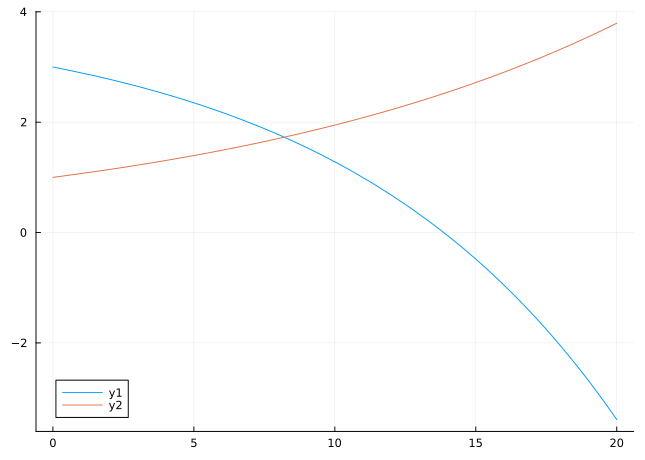

In [7]:
f(x) = 4 - exp(x/10)
g(x) = exp(x/15)
plot(f, 0, 20)
plot!(g)

Or we could plot the difference:


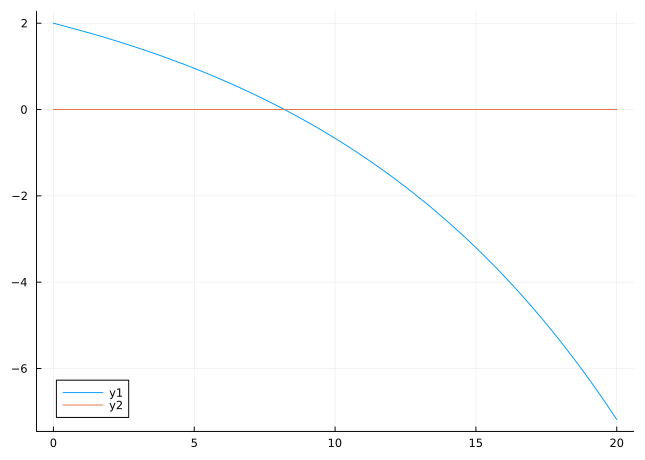

In [8]:
eqn(x) = f(x) - g(x)
plot(eqn, 0, 20)
plot!(zero)

From *either* graph, we see quickly that the interval $[5,10]$ will be a
bracketing interval for $\text{eqn}(x)$. We can numerically zoom in on
the the intersection point with:

In [9]:
fzero(eqn, 5, 10)

8.205886667065423

------------------------------------------------------------------------

In [10]:
# your commands begin here
